In [1]:
# dependency
import numpy as np
import pandas as pd
import copy
import math
import sys
import os
from activations import relu, leaky_relu, sigmoid, tanh, softmax, d_sigmoid, d_relu
from initializers import glorot_uniform, random_normal, random_uniform
from regularizers import l1_regularizer, l2_regularizer
from utility import trim_tail, multiply, subtract, get_nparams, one_hot_encoding, get_data
from metrics import MSE, CCE, ACC, PRECISION, RECALL, essential_metrics, wondering_penalty, close_gap_penalty
from pso import PSO
from ga import GA
from nn import Network
from layer import DenseLayer
from scalers import MinMaxScaler, StandardScaler

In [2]:
# reference
metrics_fn_dict = dict()
metrics_fn_dict['accuracy'] = ACC
metrics_fn_dict['categorical_crossentropy'] = CCE
metrics_fn_dict['mean_square_error'] = MSE
metrics_fn_dict['precision'] = PRECISION
metrics_fn_dict['recall'] = RECALL
metrics_fn_dict['essential_metrics'] = essential_metrics

In [3]:
# model
model = Network(5, 0.001)
model.add_layer(DenseLayer(1, 8, True, afn=sigmoid, dafn=None, rfn=None))
model.add_layer(DenseLayer(2, 4, True, afn=sigmoid, dafn=None, rfn=None))
model.add_layer(DenseLayer(3, 3, True, afn=softmax, dafn=None, rfn=None))

In [4]:
# optimizer
ga = GA(
    dict(
        m = 200,
        x_rate = [0.3, 0.5],
        m_rate = [0.2, 0.6],
        weight_constraint = [-3.,3.],
        radioactive_rating = [0.1, 0.5],
        grow_factor = [0.1, 0.5]))

In [5]:
model.compile(loss_fn = 'categorical_crossentropy', optimizer = ga, \
    metrics = ['accuracy', 'mean_square_error', 'essential_metrics','categorical_crossentropy'])

building layer 1 with 5
48
building layer 2 with 8
36
building layer 3 with 4
15


In [6]:
# data loading
DATA = os.path.join('c:\\Users\\tcumi\\github_repo\\neural-network\\', 'dataset')
GROUP = 4
COLUMNS = ['f1', 'f2', 'f3', 'f4', 'f5', 'label']
N_CLASS = 3
EPOCHS = 300
train_dir, test_dir = "..//dataset//training_data{}.txt".format(GROUP), "..//dataset//testing_data{}.txt".format(GROUP)
train, test = get_data(DATA, train_dir, COLUMNS), get_data(DATA, test_dir, COLUMNS)
# shuffle
train, test = train.sample(frac=1), test.sample(frac=1)
x_train, y_train = train.drop('label', axis=1), train['label']
x_test, y_test = test.drop('label', axis=1), test['label']

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 107 entries, 0 to 106
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   f1      107 non-null    float32
 1   f2      107 non-null    float32
 2   f3      107 non-null    float32
 3   f4      107 non-null    float32
 4   f5      107 non-null    float32
 5   label   107 non-null    float32
dtypes: float32(6)
memory usage: 2.6 KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108 entries, 0 to 107
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   f1      108 non-null    float32
 1   f2      108 non-null    float32
 2   f3      108 non-null    float32
 3   f4      108 non-null    float32
 4   f5      108 non-null    float32
 5   label   108 non-null    float32
dtypes: float32(6)
memory usage: 2.7 KB
None


In [7]:
# data scaling and encoding
scaler = StandardScaler(['f1', 'f2', 'f3', 'f4', 'f5'])
scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)
y_train = one_hot_encoding(y_train, N_CLASS)
y_test = one_hot_encoding(y_test, N_CLASS)


In [8]:
# learning phase
history = model.fit(x_train, y_train, EPOCHS)

0.6518142557589808
update global 0.6513939260322357
came in: 326
to refresh 1
Iteration 152/300: 	0.6513939260322357
update global 0.6513939260322357
update global 0.6511826559761974
came in: 315
to refresh 0
Iteration 153/300: 	0.6511826559761974
update global 0.6511826559761974
update global 0.6509355919383396
update global 0.6504880958628432
came in: 333
to refresh 0
Iteration 154/300: 	0.6504880958628432
update global 0.6504880958628432
came in: 325
to refresh 0
Iteration 155/300: 	0.6504880958628432
update global 0.6504880958628432
came in: 330
to refresh 0
Iteration 156/300: 	0.6504880958628432
update global 0.6504880958628432
came in: 312
to refresh 1
Iteration 157/300: 	0.6504880958628432
update global 0.6504880958628432
came in: 317
to refresh 0
Iteration 158/300: 	0.6504880958628432
update global 0.6504880958628432
update global 0.649991400888033
came in: 319
to refresh 1
Iteration 159/300: 	0.649991400888033
update global 0.649991400888033
came in: 323
to refresh 0
Iteration

In [9]:
import matplotlib.pyplot as plt

def draw_plot(x, y_list, x_label=None, y_label=None, legend=None, title=None):
    fig, ax = plt.subplots(figsize=(12,5))
    for y in y_list:
        ax.plot(x, y)
    if x_label is not None and y_label is not None and title is not None:
        ax.set(xlabel=x_label, ylabel=y_label, title=title)
    if legend is not None:
        ax.legend(legend)
    ax.grid()
    plt.show()



In [10]:
print(history)

[0.7613640901084259, 0.7613640901084259, 0.7612343190986419, 0.7612343190986419, 0.7612343190986419, 0.7612343190986419, 0.7612343190986419, 0.7612343190986419, 0.7612281870619159, 0.7586043170679395, 0.7586043170679395, 0.754416991617078, 0.754416991617078, 0.7102671828225394, 0.7102671828225394, 0.7102671828225394, 0.7102671828225394, 0.7102671828225394, 0.7102671828225394, 0.7102671828225394, 0.7097130891318634, 0.7097130891318634, 0.7093944371303665, 0.7093944371303665, 0.7093944371303665, 0.7093944371303665, 0.7092869838821554, 0.7087919288706557, 0.7087919288706557, 0.70872911114559, 0.70872911114559, 0.70872911114559, 0.7040299032336084, 0.7040299032336084, 0.7040299032336084, 0.7040299032336084, 0.7040299032336084, 0.7040299032336084, 0.7040299032336084, 0.6849972020799868, 0.6849972020799868, 0.6849972020799868, 0.6849972020799868, 0.6849972020799868, 0.6849972020799868, 0.6849972020799868, 0.6849972020799868, 0.6849972020799868, 0.6780046837352146, 0.6780046837352146, 0.67800

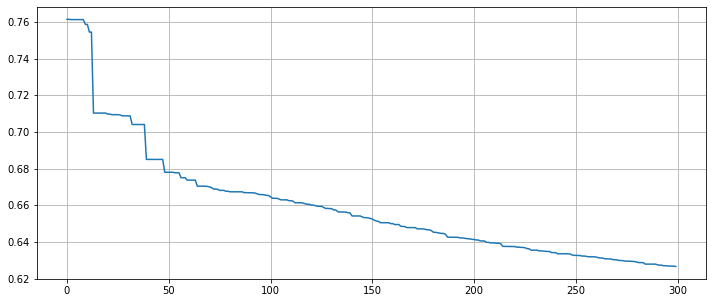

In [11]:
draw_plot(x = [i for i in range(len(history))], y_list = [history], x_label = 'Epochs', \
    y_label = model.loss_fn)

In [12]:
# recall phase
score = model.evaluate(x_test, y_test, False)
print(score)

[1. 0. 0.] <-> [[0.5475903 ]
 [0.3375028 ]
 [0.11490694]]
[1. 0. 0.] <-> [[0.38174894]
 [0.38705865]
 [0.23119245]]
[0. 1. 0.] <-> [[0.07221144]
 [0.23154072]
 [0.6962478 ]]
[1. 0. 0.] <-> [[0.4907947 ]
 [0.3601749 ]
 [0.14903036]]
[1. 0. 0.] <-> [[0.9218077 ]
 [0.0505849 ]
 [0.02760734]]
[0. 0. 1.] <-> [[0.6192632 ]
 [0.29950434]
 [0.08123248]]
[1. 0. 0.] <-> [[0.7040311 ]
 [0.23261905]
 [0.06334984]]
[1. 0. 0.] <-> [[0.641748  ]
 [0.2842502 ]
 [0.07400181]]
[1. 0. 0.] <-> [[0.91631556]
 [0.0538547 ]
 [0.02982975]]
[1. 0. 0.] <-> [[0.62288904]
 [0.29718503]
 [0.07992594]]
[0. 1. 0.] <-> [[0.88933265]
 [0.07208661]
 [0.03858074]]
[0. 1. 0.] <-> [[0.6482732 ]
 [0.27941957]
 [0.07230724]]
[1. 0. 0.] <-> [[0.68448234]
 [0.24982387]
 [0.06569375]]
[1. 0. 0.] <-> [[0.86892056]
 [0.08778591]
 [0.04329351]]
[1. 0. 0.] <-> [[0.5016593 ]
 [0.3562782 ]
 [0.14206247]]
[0. 0. 1.] <-> [[0.7599177 ]
 [0.18221366]
 [0.05786869]]
[1. 0. 0.] <-> [[0.82107997]
 [0.12787676]
 [0.05104324]]
[0. 0. 1.] <->